***

# Análisis de datos I

***

### Proyecto Final - Realiza el análisis completo de tu dataset

#### 1. Definición del problema.

La entidad bancaria enfrenta un desafío significativo con la alta tasa de abandono de clientes, lo cual afecta la estabilidad financiera y el crecimiento sostenible de la organización. En la actualidad, la entidad carece de un sistema eficaz para identificar y entender los factores que contribuyen a la pérdida de clientes.

Para abordar este problema, se busca desarrollar un modelo predictivo basado en inteligencia artificial que utilice datos demográficos, financieros y de comportamiento de los clientes. Este modelo tiene como objetivo predecir la probabilidad de abandono mediante un análisis exhaustivo de la información disponible de los perfiles de los clientes y los productos financieros que utilizan, con el fin de identificar patrones y factores de riesgo relevantes. La información obtenida permitirá diseñar y aplicar estrategias de retención personalizadas, basadas en el comportamiento y las necesidades específicas de los clientes, con el objetivo de reducir significativamente la tasa de abandono y mejorar la fidelización. El éxito del modelo dependerá de su capacidad para analizar datos de manera efectiva y proporcionar información valiosa que facilite intervenciones específicas para los clientes en riesgo, mejorando así la satisfacción del cliente y la estabilidad financiera de la entidad.

#### 2. Definición de la pregunta SMART

¿Es posible predecir la probabilidad de que un cliente abandone una entidad bancaria a partir de un modelo predictivo basado en inteligencia artificial que analice los datos demográficos, financieros y de comportamiento disponibles de los clientes?

#### 3. Preparación de los datos

A continuación, se presentará la preparación de los datos del dataset seleccionado.

Inicialmente se procede a cargar las bibliotecas requeridas para la implementación, y se realizará la carga del dataset en un DataFrame.

In [350]:
# Importar las bibliotecas de Python requeridas.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear el Data Frame.
df = pd.read_csv('customer_churn_records.csv')

# Imprimir los primeros cinco registros del DataFrame.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [351]:
# Imprimir los últimos cinco registros del DataFrame.
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


El DataFrame contiene un total de 10,000 registros, el cual presenta una combinación de variables categóricas y numéricas que son importantes para el análisis predictivo del abandono de clientes. Entre las variables categóricas se encuentran **Geography**, **Gender**, **HasCrCard**, **IsActiveMember**, y **Card Type**. Estas variables brindan información sobre la ubicación geográfica, el género, la posesión de tarjeta de crédito, el estado del cliente y el tipo de tarjeta, lo cual es determinante para identificar patrones demográficos y de comportamiento que pueden impactar la probabilidad de abandono.

Por otro lado, las variables numéricas son **CreditScore**, **Age**, **Tenure**, **Balance**, **NumOfProducts**, **EstimatedSalary**, **Complain**, **Satisfaction Score**, y **Point Earned**. Estas variables cuantitativas reflejan aspectos clave de la situación financiera del cliente, su antigüedad con el banco y su nivel de satisfacción. La integración de estas variables en el modelo predictivo es fundamental para comprender cómo los factores financieros y de satisfacción impactan la probabilidad de abandono de clientes, lo que permite desarrollar un modelo más preciso y relevante.

In [352]:
# Eliminar la columnas RowNumber, CustomerId y Surname del DataFrame.
df = df.drop('RowNumber', axis = 1)
df = df.drop('CustomerId', axis = 1)
df = df.drop('Surname', axis = 1)

Las columnas **RowNumber**, **CustomerId** y **Surname** son eliminadas del DataFrame debido a que no aportan valor predictivo y pueden introducir ruido en el modelo.

- ***RowNumber***: Esta columna contiene un identificador único y secuencial para cada fila de datos. Dado que su propósito es simplemente numerar las filas y no tiene relación con las características del cliente ni con el abandono, su inclusión no aporta información relevante para el modelo y puede interferir con el análisis.
- ***CustomerId***: Esta columna contiene un identificador único para cada cliente. Aunque es útil para la identificación individual de los clientes, no proporciona información sobre sus características ni su probabilidad de abandono. Su inclusión en el modelo puede introducir ruido sin aportar valor predictivo, ya que no contribuye a la comprensión del comportamiento de abandono.
- ***Surname***: Esta columna contiene el nombre del cliente, una variable categórica que, al ser convertida numérica, genera un gran número de categorías únicas. La conversión a números de cada nombre genera miles de categorías diferentes, muchas de las cuales son irrelevantes y pueden causar sobreajuste, además de no contribuir a la predicción de la probabilidad de abandono. Dado que el nombre del cliente no tiene una relación directa con el comportamiento de abandono, esta variable se considera irrelevante para el modelo.

Se procede a actualizar los nombres de las columnas del DataFrame para que sean más claros y descriptivos, facilitando así su comprensión y análisis.

In [353]:
# Definir los nombres de las columas del DataFrame.
df.columns = ['PuntajeCredito', 'Pais', 'Genero', 'Edad', 'TiempoPermanencia', 'Saldo', 'CantidadProductos', 'TieneTarjetaCredito', 'EstaActivo', 'SalarioEstimado', 'ClienteAbandono', 'HizoReclamo', 'NivelSatisfaccion', 'TipoTarjeta', 'PuntosObtenidos']

# Imprimir los primeros cinco registros del DataFrame.
df.head()

,PuntajeCredito,Pais,Genero,Edad,TiempoPermanencia,Saldo,CantidadProductos,TieneTarjetaCredito,EstaActivo,SalarioEstimado,ClienteAbandono,HizoReclamo,NivelSatisfaccion,TipoTarjeta,PuntosObtenidos
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


A continuación, se verificará si existen datos vacíos o faltantes, así como duplicados en el DataFrame.

In [354]:
# Verificar si existen datos vacíos o faltantes en el DataFrame.
df.isna().sum()

PuntajeCredito         0
Pais                   0
Genero                 0
Edad                   0
TiempoPermanencia      0
Saldo                  0
CantidadProductos      0
TieneTarjetaCredito    0
EstaActivo             0
SalarioEstimado        0
ClienteAbandono        0
HizoReclamo            0
NivelSatisfaccion      0
TipoTarjeta            0
PuntosObtenidos        0
dtype: int64

Se puede observar que no hay datos vacíos o faltantes en el dataset definido.

In [355]:
# Verificar si existen datos duplicados en el DataFrame.
print(f'Cantidad de datos duplicados: {df.duplicated().sum()}')

Cantidad de datos duplicados: 0


Se puede observar que no hay datos duplicados en el dataset definido.

A continuación, se realiza el análisis de distribución de las variables categóricas del dataset (**Pais**, **Genero** y **TipoTarjeta**).

In [357]:
# Obtener la cantidad de registros de la columna Pais.
print('Cantidad de registros de la columna Pais según su categoría:')
df['Pais'].value_counts()

Cantidad de registros de la columna Pais según su categoría:


Pais
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [358]:
# Obtener la cantidad de registros de la columna Genero.
print('Cantidad de registros de la columna Genero según su categoría:')
df['Genero'].value_counts()

Cantidad de registros de la columna Genero según su categoría:


Genero
Male      5457
Female    4543
Name: count, dtype: int64

In [359]:
# Obtener la cantidad de registros de la columna TipoTarjeta.
print('Cantidad de registros de la columna TipoTarjeta según su categoría:')
df['TipoTarjeta'].value_counts()

Cantidad de registros de la columna TipoTarjeta según su categoría:


TipoTarjeta
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

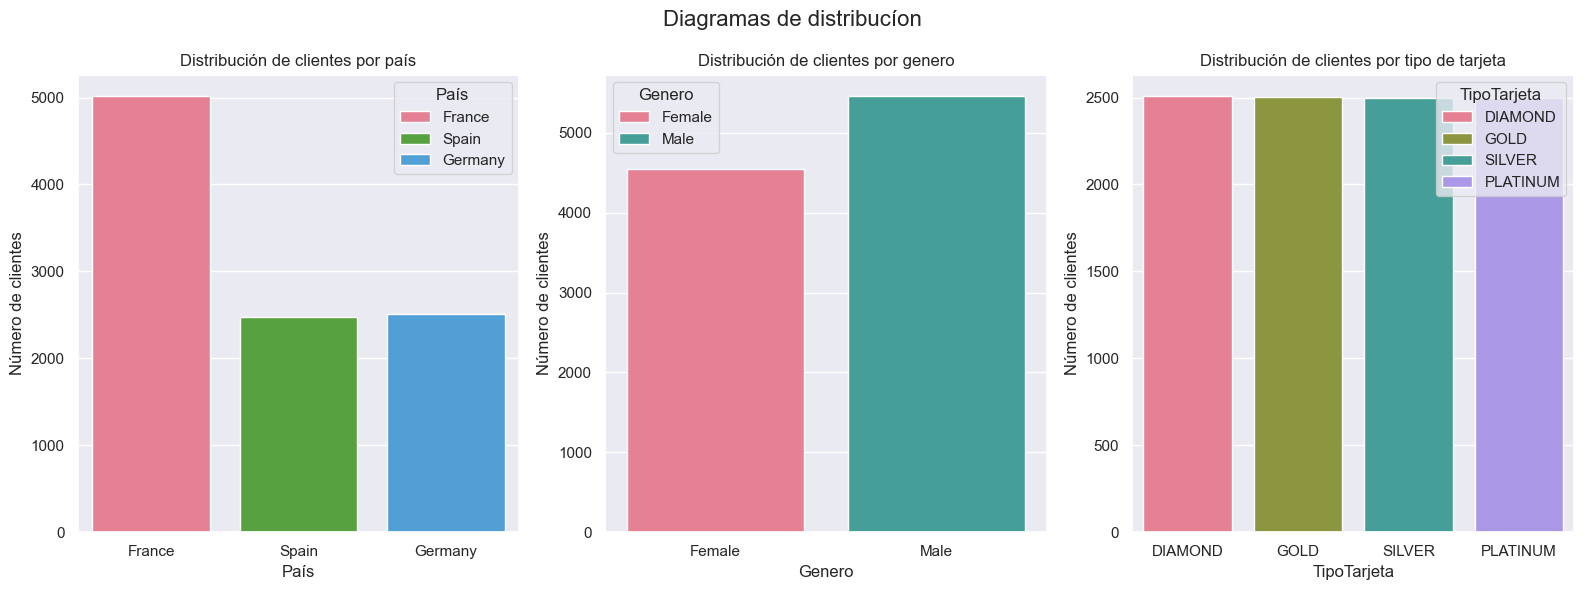

In [360]:
# Gráfico de distribución las columnas Pais, Genero y TipoTarjeta.
plt.figure(figsize = (16, 6))
plt.suptitle('Diagramas de distribucíon', fontsize = 16)

plt.subplot(1, 3, 1)
palette = sns.color_palette('husl', len(df['Pais'].unique()))
ax = sns.countplot(data = df, x = 'Pais', hue = 'Pais', palette = palette)

plt.xlabel('País')
plt.ylabel('Número de clientes')
plt.title('Distribución de clientes por país')
plt.legend(labels = df['Pais'].unique(), title = 'País', loc = 'best')

plt.subplot(1, 3, 2)
palette = sns.color_palette('husl', len(df['Genero'].unique()))
ax = sns.countplot(data = df, x = 'Genero', hue = 'Genero', palette = palette)

plt.xlabel('Genero')
plt.ylabel('Número de clientes')
plt.title('Distribución de clientes por genero')
plt.legend(labels = df['Genero'].unique(), title = 'Genero', loc = 'best')

plt.subplot(1, 3, 3)
palette = sns.color_palette('husl', len(df['TipoTarjeta'].unique()))
ax = sns.countplot(data = df, x = 'TipoTarjeta', hue = 'TipoTarjeta', palette = palette)

plt.xlabel('TipoTarjeta')
plt.ylabel('Número de clientes')
plt.title('Distribución de clientes por tipo de tarjeta')
plt.legend(labels = df['TipoTarjeta'].unique(), title = 'TipoTarjeta', loc = 'best')

plt.tight_layout()
plt.show()

Los diagramas de distribución de clientes por **Pais**, **Genero** y **TipoTarjeta** revelan información importante sobre el conjunto de datos. La variable **Pais** muestra un desequilibrio notable, con una mayoría de registros provenientes de Francia (5014) en comparación con Alemania (2509) y España (2477). Este desbalance podría introducir un sesgo en el modelo, dado que los clientes franceses tienen una representación desproporcionada. En contraste, las variables **Genero** y **TipoTarjeta** presentan una distribución más equilibrada. La diferencia en el número de clientes entre géneros es mínima, con 5457 hombres y 4543 mujeres, sugiriendo una ligera predominancia masculina, pero si una variación significativa. La distribución entre los tipos de tarjeta es casi uniforme, con cifras similares para DIAMOND, GOLD, SILVER, y PLATINUM, lo que indica una ausencia de sesgo en esta categoría.

El desbalance evidenciado en la variable **Pais**, podría sugerir la necesidad de ajustar el modelo para evitar el impacto que pueda generar la representación excesiva de un país. Por otro lado, el equilibrio en **Genero** y **TipoTarjeta** es favorable y no parece introducir un sesgo significativo en el modelo, lo que permite que el análisis se enfoque en las características que realmente influyen en la probabilidad de abandono de clientes.

A continuación, se procederá a realizar el proceso de label encoding para convertir las columnas categóricas del dataset en numéricas.

In [361]:
# Crear una instancia de label encoder.
label = LabelEncoder()

df['Pais'] = label.fit_transform(df['Pais'])

# Obtener la cantidad de registros de Pais con los valores actualizados después de aplicar label encoding.
print('Cantidad de registros de la columna Pais después de aplicar el proceso de label encoding:')
df['Pais'].value_counts()

Cantidad de registros de la columna Pais después de aplicar el proceso de label encoding:


Pais
0    5014
1    2509
2    2477
Name: count, dtype: int64

- France se convirtió en 0
- Germany se convirtió en 1
- Spain se convirtió en 2

In [362]:
df['Genero'] = label.fit_transform(df['Genero'])

# Obtener la cantidad de registros de Genero con los valores actualizados después de aplicar label encoding.
print('Cantidad de registros de la columna Genero después de aplicar el proceso de label encoding:')
df['Genero'].value_counts()

Cantidad de registros de la columna Genero después de aplicar el proceso de label encoding:


Genero
1    5457
0    4543
Name: count, dtype: int64

- Male se convirtió en 0
- Female se convirtió en 1

In [363]:
df['TipoTarjeta'] = label.fit_transform(df['TipoTarjeta'])

# Obtener la cantidad de registros de TipoTarjeta con los valores actualizados después de aplicar label encoding.
print('Cantidad de registros de la columna TipoTarjeta después de aplicar el proceso de label encoding:')
df['TipoTarjeta'].value_counts()

Cantidad de registros de la columna TipoTarjeta después de aplicar el proceso de label encoding:


TipoTarjeta
0    2507
1    2502
3    2496
2    2495
Name: count, dtype: int64

- DIAMOND se convirtió en 0
- GOLD se convirtió en 1
- SILVER se convirtió en 2
- PLATINUM se convirtió en 3

#### 4. Análisis estadístico y gráfico multivariado

A continuación, se presenta el análisis estadístico y gráfico multivariado del dataset seleccionado.

Para iniciar, se realiza el análisis univariado de la variable objetivo **ClienteAbandono**.

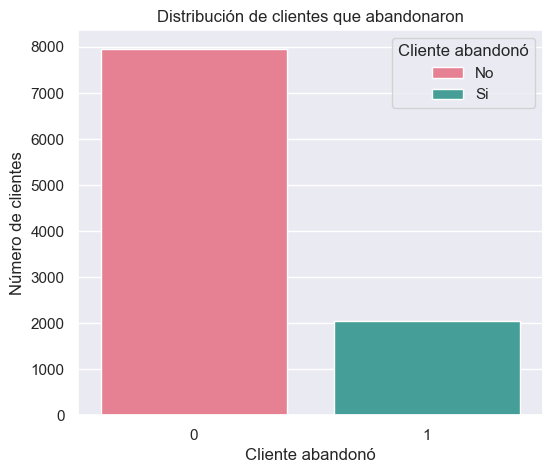

Cantidad de registros de la columna ClienteAbandono (0 - No, 1 - Si):


ClienteAbandono
0    7962
1    2038
Name: count, dtype: int64

In [365]:
# Gráfico countplot de ClienteAbandono.
cliente_abandono = df['ClienteAbandono'].replace({0: 'No', 1: 'Si'})
cliente_abandono = df['ClienteAbandono'].astype(str)

plt.figure(figsize = (6, 5))

palette = sns.color_palette('husl', len(cliente_abandono.unique()))
ax = sns.countplot(data = df, x = 'ClienteAbandono', hue = 'ClienteAbandono', palette = palette)

plt.xlabel('Cliente abandonó')
plt.ylabel('Número de clientes')
plt.title('Distribución de clientes que abandonaron')
plt.legend(labels = ['No', 'Si'], title = 'Cliente abandonó', loc = 'best')
plt.show()

# Obtener la cantidad de registros de ClienteAbandono.
print('Cantidad de registros de la columna ClienteAbandono (0 - No, 1 - Si):')
df['ClienteAbandono'].value_counts()

El análisis del diagrama de distribución de la columna **ClienteAbandono** revela un desbalance significativo en los datos. De un total de 10,000 clientes, solo el 20.4% (2,038 clientes) ha abandonado (1 - Si), mientras que el 79.6% (7,962 clientes) permanece en la entidad bancaria (0 - No). Este desbalance en la distribución puede afectar la precisión del modelo predictivo, ya que puede inducir un sesgo hacia el grupo mayoritario. En consecuencia, el modelo podría mostrar una alta precisión general al predecir respecto a este, pero su capacidad para identificar correctamente a los clientes que abandonan el servicio podría ser limitada, reduciendo así la efectividad en la predicción del abandono de clientes.

A continuación, se presentan los estadísticos descriptivos del DataFrame y el diagrama de dispersión múltiple.

In [366]:
# Obtener los estadísticos descriptivos del DataFrame.
df.describe()

,PuntajeCredito,Pais,Genero,Edad,TiempoPermanencia,Saldo,CantidadProductos,TieneTarjetaCredito,EstaActivo,SalarioEstimado,ClienteAbandono,HizoReclamo,NivelSatisfaccion,TipoTarjeta,PuntosObtenidos
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,1.498000,606.515100
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,1.118356,225.924839
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,0.000000,119.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,0.000000,410.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,1.000000,605.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,2.000000,801.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,3.000000,1000.000000


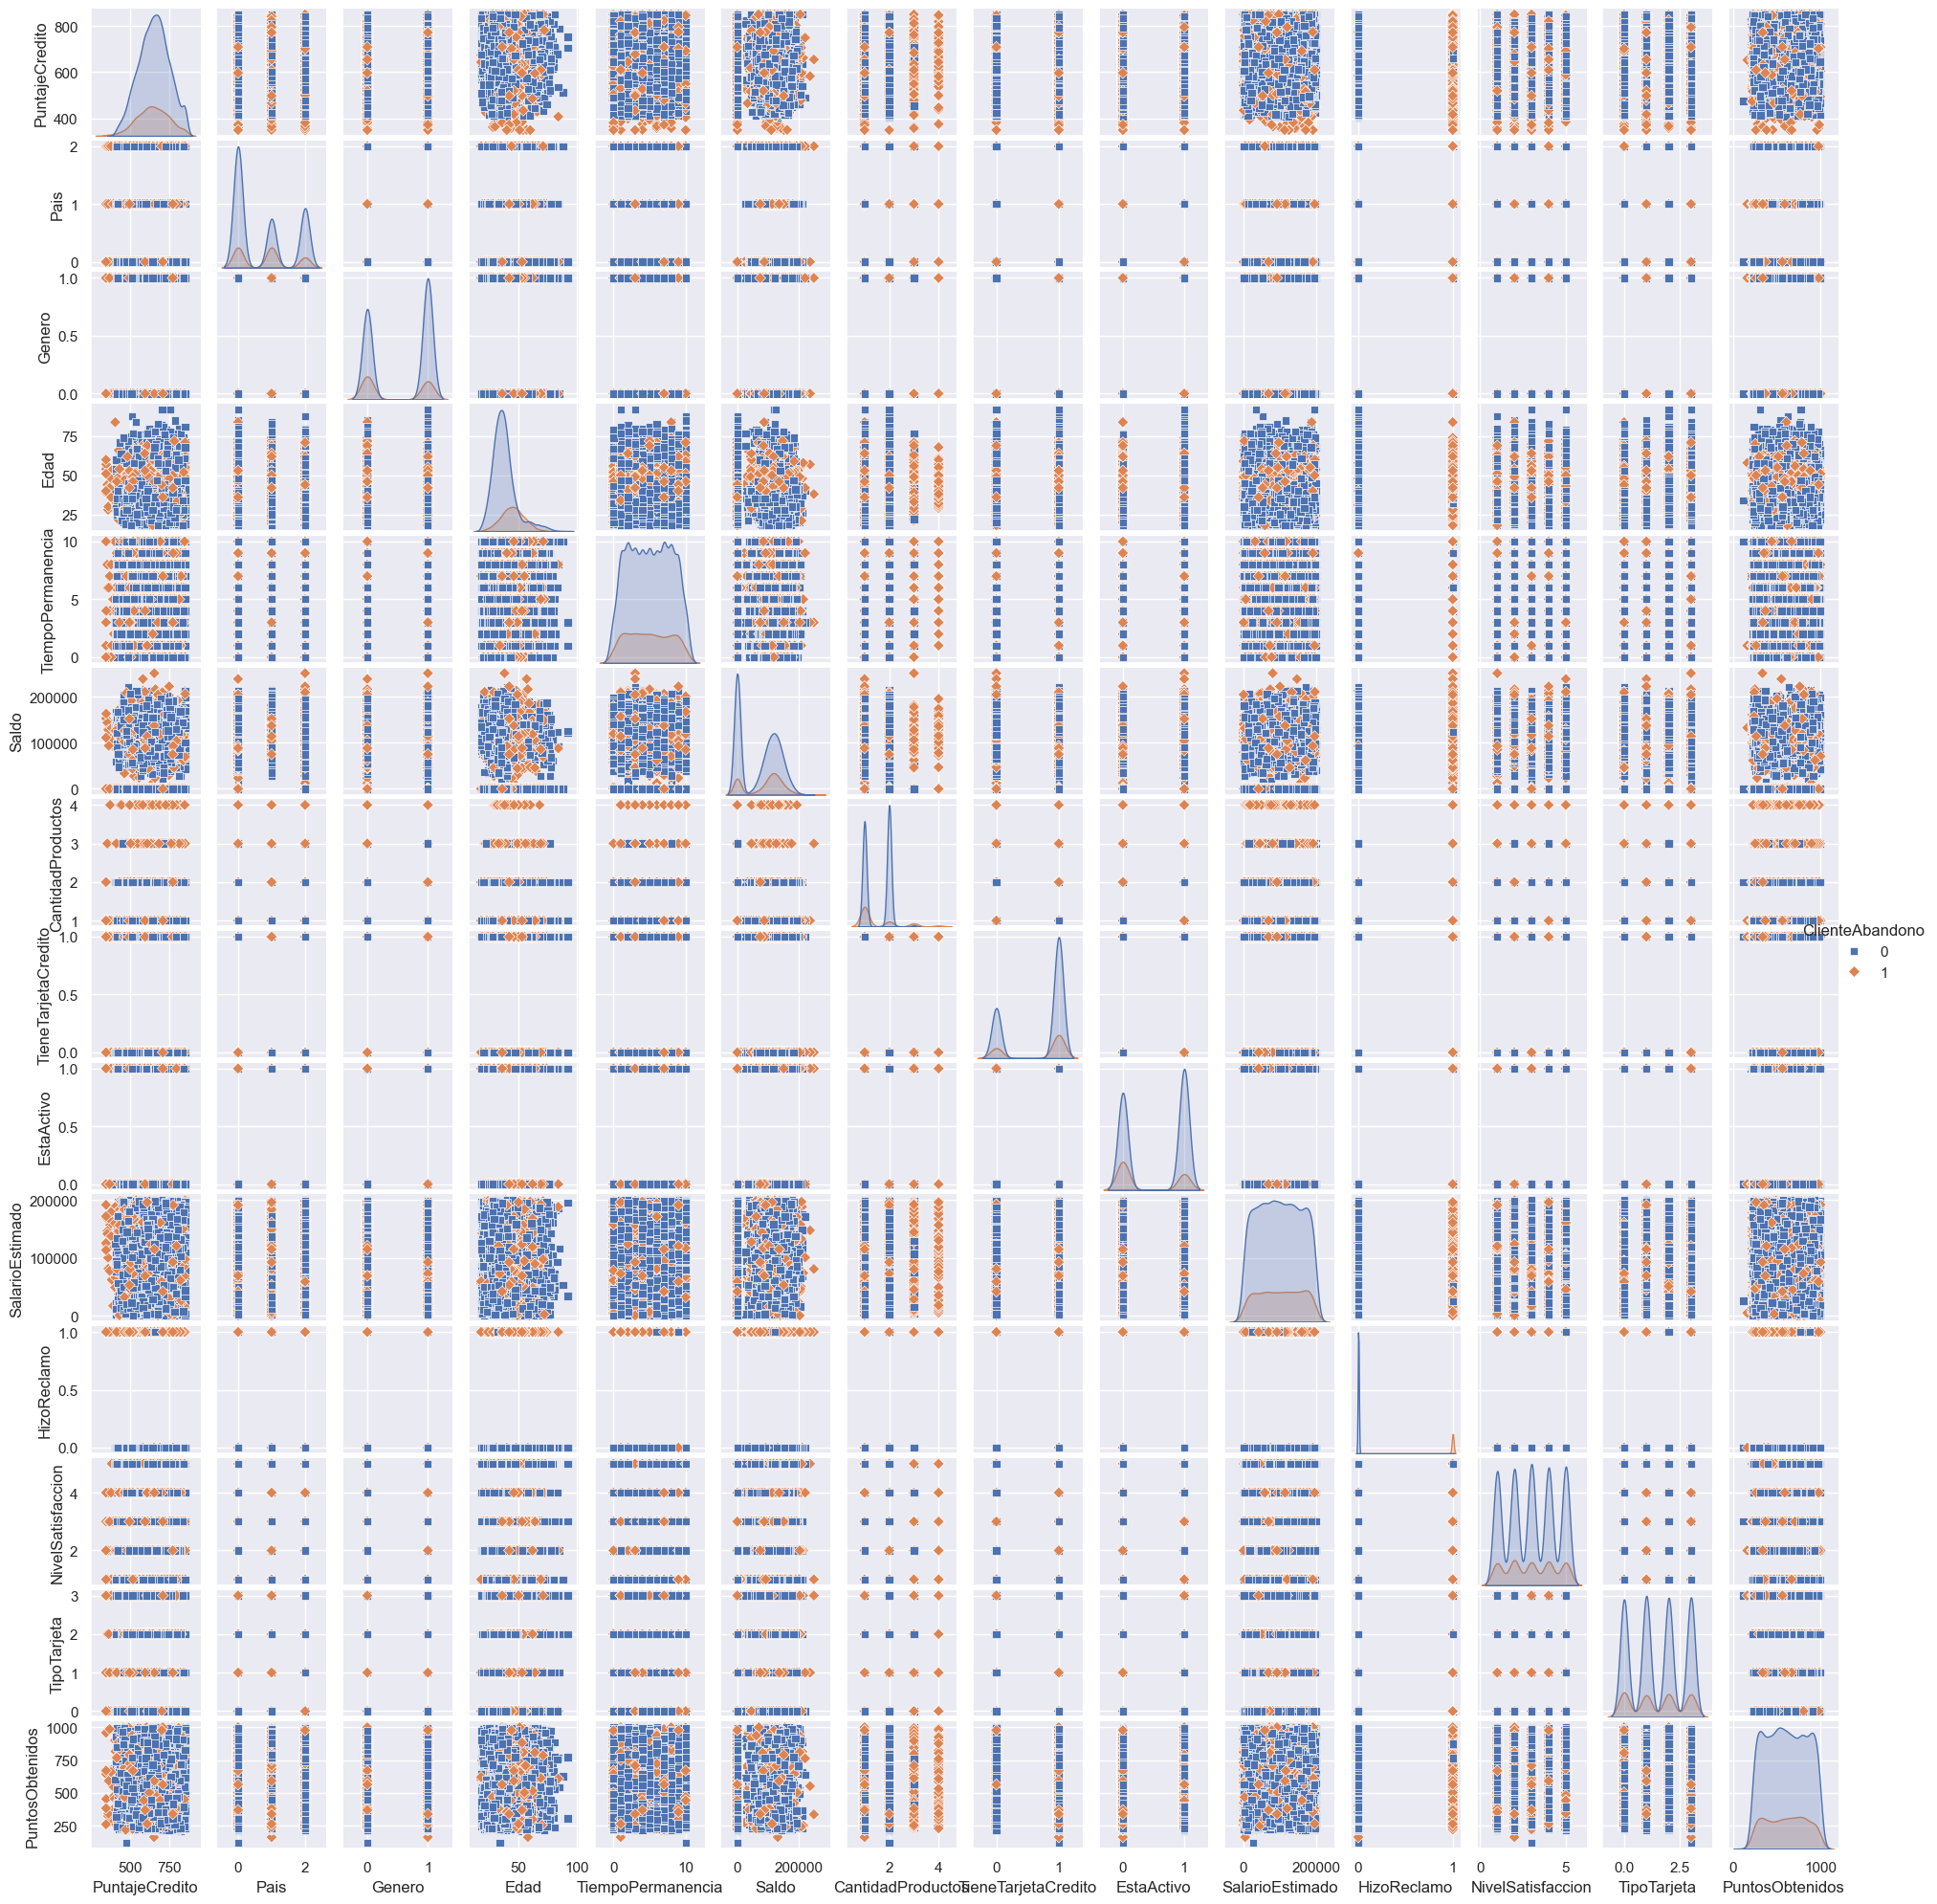

In [367]:
g = sns.pairplot(df, hue = 'ClienteAbandono', markers = ['s', 'D'])
g.fig.set_figheight(20)
g.fig.set_figwidth(20)

El análisis del diagrama de dispersión múltiple en relación con la variable objetivo **ClienteAbandono** revela que los clientes que  han presentado reclamaciones muestran una alta tendencia a abandonar. Además, la **Edad** se identifica como un factor relevante en la decisión de abandonar, sugiriendo una relación significativa con el abandono de clientes.

Respecto a la variable **EstaActivo**, su relación con el abandono indica que el estado de actividad del cliente tiene una influencia notable en la decisión de abandonar. Por otro lado, variables como **TieneTarjetaCredito**, **NivelSatisfaccion** y **PuntosObtenidos** no presentan una relación significativa con el abandono, indicando que estos factores tienen un impacto menor en la decisión de abandonar la entidad bancaria.

Para evaluar el impacto de las variables del dataset en la probabilidad de que un cliente abandone la entidad bancaria, se analizará su correlación (mediante los métodos de Pearson, Spearman y Kendall) con la variable objetivo **ClienteAbandono**.

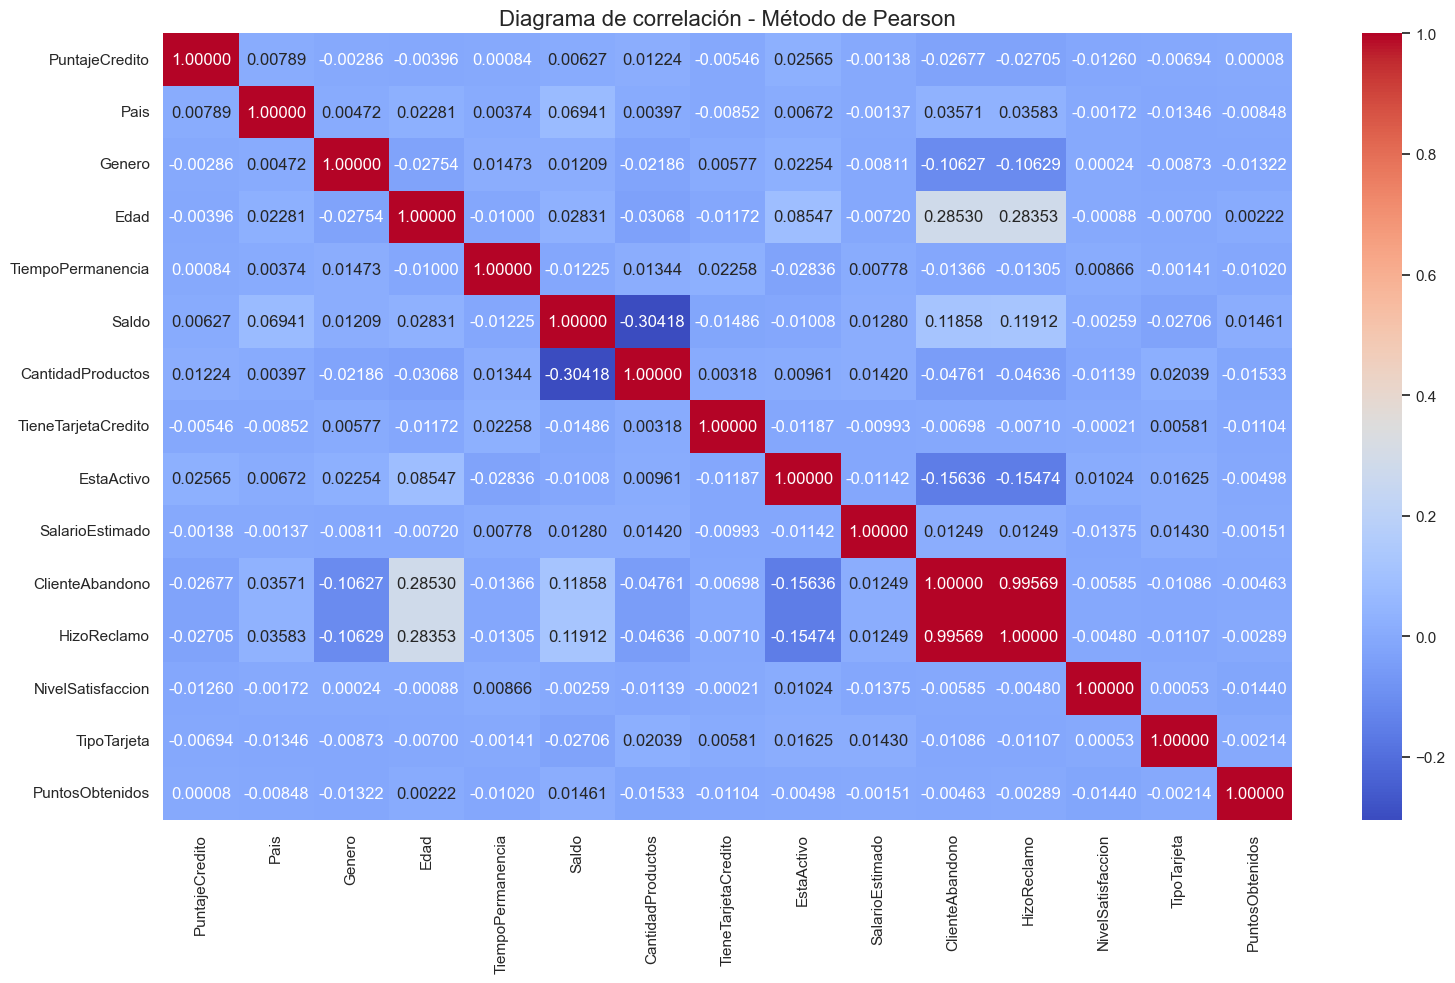

Correlación de ClienteAbandono - Método de Pearson
PuntajeCredito        -0.026771
Pais                   0.035712
Genero                -0.106267
Edad                   0.285296
TiempoPermanencia     -0.013656
Saldo                  0.118577
CantidadProductos     -0.047611
TieneTarjetaCredito   -0.006976
EstaActivo            -0.156356
SalarioEstimado        0.012490
ClienteAbandono        1.000000
HizoReclamo            0.995693
NivelSatisfaccion     -0.005849
TipoTarjeta           -0.010861
PuntosObtenidos       -0.004628
Name: ClienteAbandono, dtype: float64


In [369]:
# Gráfico del mapa de calor de la matriz de correlación utilizando el método de Pearson.
plt.figure(figsize = (16, 10))
plt.title('Diagrama de correlación - Método de Pearson', fontsize = 16)

sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap = 'coolwarm', fmt = '.5f')

plt.tight_layout()
plt.show()

# Cálculo de la correlación respecto a ClienteAbandono utilizando el método de Pearson.
print(f'Correlación de ClienteAbandono - Método de Pearson')
print(df.corr(method = 'pearson')['ClienteAbandono'])

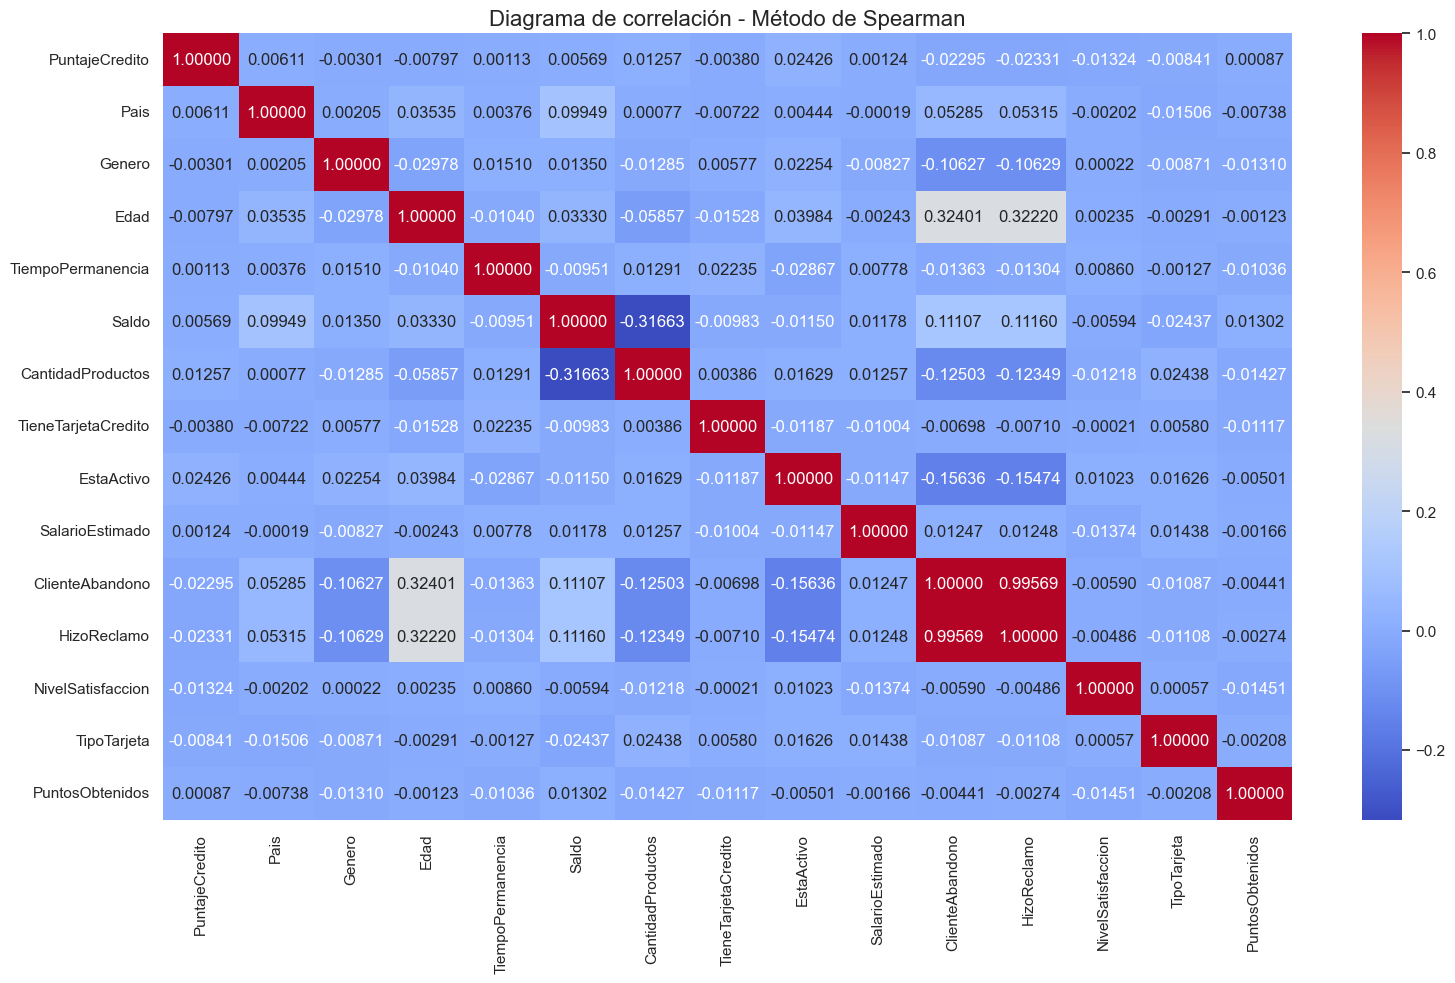

Correlación de ClienteAbandono - Método de Spearman
PuntajeCredito        -0.022948
Pais                   0.052849
Genero                -0.106267
Edad                   0.324012
TiempoPermanencia     -0.013628
Saldo                  0.111069
CantidadProductos     -0.125026
TieneTarjetaCredito   -0.006976
EstaActivo            -0.156356
SalarioEstimado        0.012472
ClienteAbandono        1.000000
HizoReclamo            0.995693
NivelSatisfaccion     -0.005905
TipoTarjeta           -0.010873
PuntosObtenidos       -0.004406
Name: ClienteAbandono, dtype: float64


In [370]:
# Gráfico del mapa de calor de la matriz de correlación utilizando el método de Spearman.
plt.figure(figsize = (16, 10))
plt.title('Diagrama de correlación - Método de Spearman', fontsize = 16)

sns.heatmap(df.corr(method = 'spearman'), annot = True, cmap = 'coolwarm', fmt = '.5f')

plt.tight_layout()
plt.show()

# Cálculo de la correlación respecto a ClienteAbandono utilizando el método de Spearman.
print(f'Correlación de ClienteAbandono - Método de Spearman')
print(df.corr(method = 'spearman')['ClienteAbandono'])

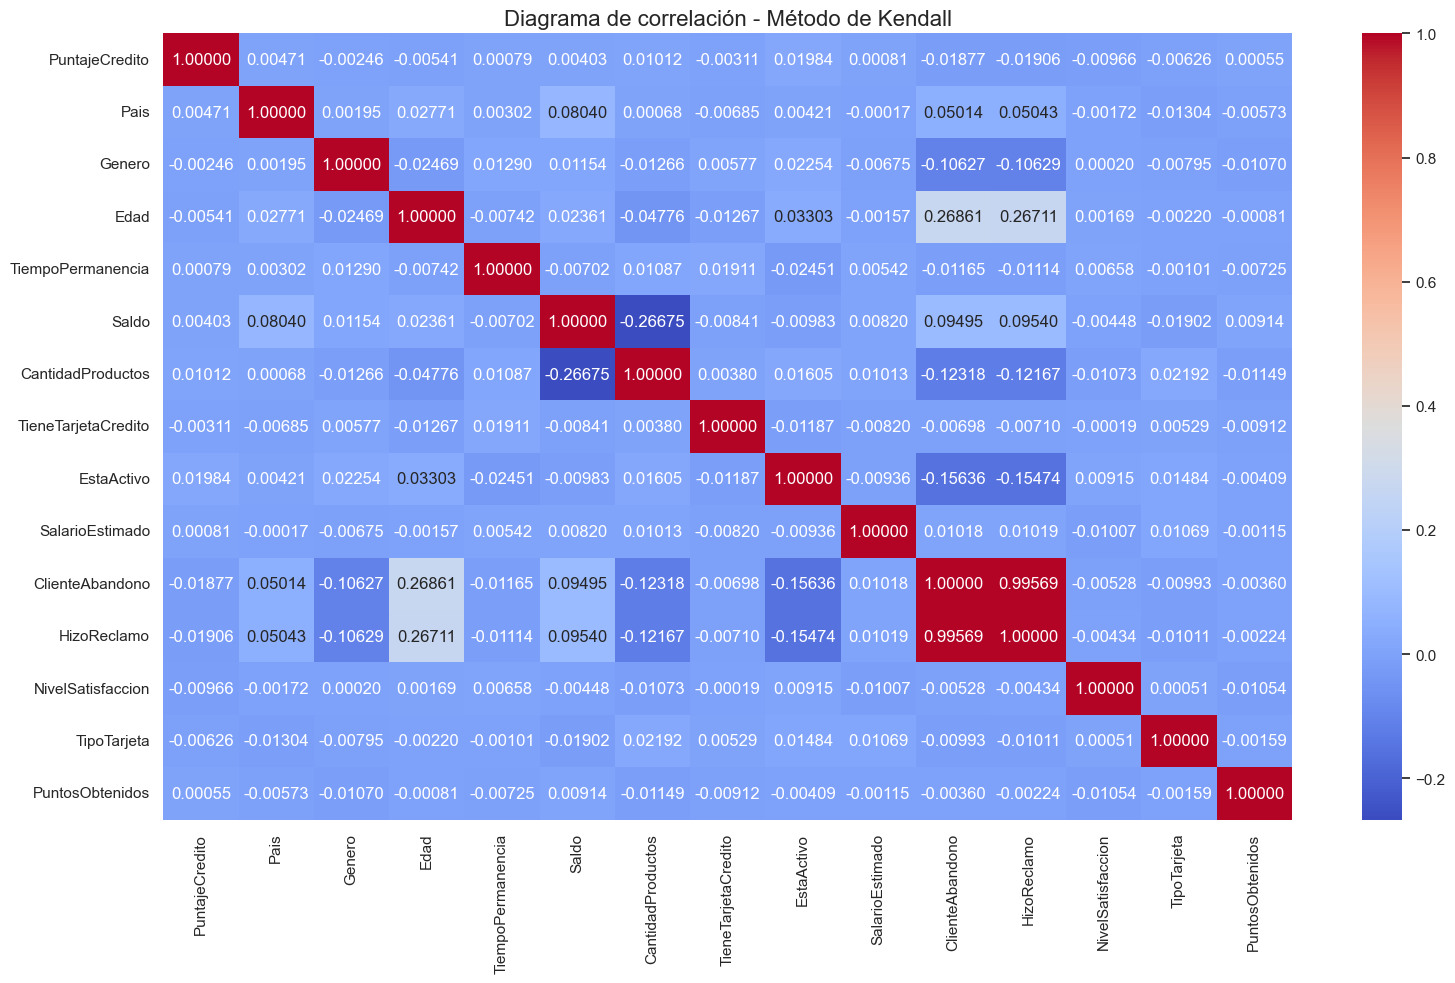

Correlación de ClienteAbandono - Método de Kendall
PuntajeCredito        -0.018769
Pais                   0.050142
Genero                -0.106267
Edad                   0.268610
TiempoPermanencia     -0.011648
Saldo                  0.094947
CantidadProductos     -0.123182
TieneTarjetaCredito   -0.006976
EstaActivo            -0.156356
SalarioEstimado        0.010184
ClienteAbandono        1.000000
HizoReclamo            0.995693
NivelSatisfaccion     -0.005282
TipoTarjeta           -0.009926
PuntosObtenidos       -0.003600
Name: ClienteAbandono, dtype: float64


In [371]:
# Gráfico del mapa de calor de la matriz de correlación utilizando el método de Kendall.
plt.figure(figsize = (16, 10))
plt.title('Diagrama de correlación - Método de Kendall', fontsize = 16)

sns.heatmap(df.corr(method = 'kendall'), annot = True, cmap = 'coolwarm', fmt = '.5f')

plt.tight_layout()
plt.show()

# Cálculo de la correlación respecto a ClienteAbandono utilizando el método de Kendall.
print(f'Correlación de ClienteAbandono - Método de Kendall')
print(df.corr(method = 'kendall')['ClienteAbandono'])

El análisis de la correlación respecto a la variable objetivo **ClienteAbandono**, muestra consistencia de los resultados a través de los métodos de Pearson, Spearman y Kendall especialmente en los casos de correlaciones fuertes, como la correlación positiva con **HizoReclamo** que es idéntica en los tres métodos (0.995693).

La variable **Edad** muestra una correlación positiva significativa con **ClienteAbandono** en todos los métodos, aunque la magnitud varía ligeramente (0.285296 en Pearson, 0.324012 en Spearman y 0.268610 en Kendall). La variable **EstaActivo** también muestra una correlación negativa consistente con **ClienteAbandono** en todos los métodos, con valores alrededor de -0.156.

A continuación, se listan las variables que se identifica tienen gran impacto respecto a la variable objetivo **ClienteAbandono**.

- **HizoReclamo**: La correlación extremadamente alta (cercana a 1) en todos los métodos indica que los clientes que hicieron reclamos tienen una alta probabilidad de abandonar la entidad bancaria. Esta es la variable más impactante respecto a predecir el abandono de clientes.
- **Edad**: Aunque no tiene una correlación tan alta como **HizoReclamo**, la edad tiene una correlación positiva significativa con **ClienteAbandono** en todos los métodos. Esto sugiere que la edad del cliente puede ser un factor relevante, con clientes de mayor edad mostrando una mayor probabilidad de abandono.
- **EstaActivo**: La correlación negativa consistente con **ClienteAbandono** indica que los clientes que no están activos tienen una mayor probabilidad de abandonar. Esto es un indicador clave de que el estado de actividad del cliente está fuertemente relacionado con el abandono.

#### 5. Implementación del modelo

Para abordar el problema de predicción de abandono de clientes en la entidad bancaria se ha implementado un modelo predictivo, para el cual se seleccionaron tres métodos de clasificación que incluyen tanto enfoques tradicionales como técnicas de aprendizaje automático más sofisticadas. Los modelos seleccionados son **Regresión Logística**, **Random Forest Classifier** y **Multi-layer Perceptron Classifier**. Cada uno de estos modelos ofrece ventajas únicas que se presentan a continuación.

- **Regresión Logística**: Es un modelo de clasificación tradicional que se selecciona por su simplicidad y capacidad de interpretación en problemas de clasificación binaria. Se configura con ***max_iter = 1000*** para permitir un entrenamiento exhaustivo, especialmente en problemas complejos. El uso del parámetro ***random_state = 42*** asegura que los resultados sean reproducibles, permitiendo una comparación fiable entre modelos.
- **Random Forest Classifier**: Es un método de aprendizaje automático que utiliza múltiples árboles de decisión para realizar predicciones, el cual se elige por su habilidad para manejar datos con características no lineales y complejas sin riesgo significativo de sobreajuste. Se ha utilizado ***n_estimators = 100***, un valor que ofrece un buen balance entre la precisión del modelo y el tiempo de entrenamiento o tiempo de computación. El parámetro ***random_state = 42*** se utiliza para garantizar que los resultados sean reproducibles en diferentes ejecuciones del modelo.
- **Multi-layer Perceptron Classifier**: Corresponde a una red neuronal artificial, las cuales son especialmente útiles para modelar relaciones no lineales complejas entre las características y la variable objetivo. Se ha configurado con una capa oculta de 10 neuronas ***hidden_layer_sizes = (10,)*** y ***max_iter = 1000*** para permitir suficiente tiempo de entrenamiento. El uso de ***random_state = 42*** garantiza la consistencia de los resultados, facilitando la comparación entre diferentes ejecuciones.

El tamaño del conjunto de prueba se ha establecido en el 20% (***test_size = 0.2***) del total de los datos. Esta proporción proporciona un equilibrio adecuado entre el tamaño del conjunto de entrenamiento y el conjunto de prueba. En un conjunto de datos de 10,000 registros, esto se traduce en 2,000 registros para la prueba, lo cual es suficiente para evaluar de manera robusta el rendimiento del modelo sin comprometer la cantidad de datos disponible para el entrenamiento.

A continuación, se presenta el código de la implementación y la evaluación de los modelos.

In [373]:
# Separar las características y la variable objetivo.
X = df.drop('ClienteAbandono', axis = 1)
y = df['ClienteAbandono']

# Dividir los datos en conjunto de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Preprocesamiento de datos.
scaler = StandardScaler()

# Función para evaluar los modelos.
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    # Generar el pipeline.
    pipeline = Pipeline(
        steps = [
            ('scaler', scaler),
            ('classifier', model)
        ]
    )
    
    # Entrenar el modelo.
    pipeline.fit(X_train, y_train)
    
    # Realizar las predicciones.
    y_pred = pipeline.predict(X_test)
    
    # Evaluar el modelo.
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f'Modelo: {model_name}')
    print(f'Precisión: {accuracy:.2f}')
    print('Reporte de Clasificación:')
    print(report)

# Modelos a comparar.
models = {
    'Regresión Logística': LogisticRegression(max_iter = 1000, random_state = 42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators = 100, random_state = 42),
    'Multi-layer Perceptron Classifier': MLPClassifier(hidden_layer_sizes = (10,), max_iter = 1000, random_state = 42)
}

# Evaluar todos los modelos.
for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)

Modelo: Regresión Logística
Precisión: 1.00
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Modelo: Random Forest Classifier
Precisión: 1.00
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Modelo: Multi-layer Perceptron Classifier
Precisión: 1.00
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
        

Los resultados obtenidos para los tres modelos de clasificación (**Regresión Logística**, **Random Forest Classifier** y **Multi-layer Perceptron Classifier**) muestran una precisión del 100% en el conjunto de prueba, con métricas de rendimiento perfectamente equilibradas entre las clases (0 y 1). Todos los modelos presentan una precisión, capacidad de recuperación (recall) y puntuación F1 (F1-score) de 1.00 para ambas clases, lo que indica un rendimiento excepcional en la clasificación de los datos de abandono de clientes. La alta precisión y capacidad de recuperación para ambas clases sugieren que los modelos han aprendido a diferenciar eficazmente entre clientes que abandonan y los que no, con una tasa de error extremadamente baja.

A pesar de la alta precisión de todos los modelos, es importante destacar que este resultado puede ser indicativo de que el conjunto de datos es relativamente sencillo o que hay una alta uniformidad en los datos. Sin embargo, el hecho de que todos los modelos (desde el más tradicional como la **Regresión Logística** hasta el más avanzado como  **Multi-layer Perceptron Classifier**) hayan alcanzado el mismo nivel de precisión refuerza la confianza en la capacidad de estos métodos para clasificar correctamente el abandono de clientes en este conjunto de datos específico.

Respecto la pregunta SMART se puede afirmar que los resultados obtenidos dan una respuesta afirmativa, ya que indican que es posible predecir con alta precisión la probabilidad de que un cliente abandone una entidad bancaria utilizando modelos predictivos basados en inteligencia artificial que analicen datos demográficos, financieros y de comportamiento. La precisión del 100% y las métricas de rendimiento equilibradas entre las clases obtenidas con los modelos de clasificación (**Regresión Logística**, **Random Forest Classifier** y **Multi-layer Perceptron Classifier**) demuestran que los modelos pueden diferenciar de manera efectiva entre clientes que abandonan y aquellos que no lo hacen. Este alto rendimiento sugiere que los modelos son capaces de capturar patrones relevantes en los datos y realizar predicciones precisas sobre el abandono de clientes. No obstante, es fundamental considerar la posibilidad de que estos resultados puedan estar influenciados por características específicas del conjunto de datos, por lo que se recomienda validar la generalización del modelo en diferentes contextos para asegurar su aplicabilidad y eficacia en escenarios futuros.

#### 6. Conclusiones

1. La limpieza y transformación de datos mejoró la precisión del modelo, eliminando variables irrelevantes y asegurando la integridad de los datos.
2. El análisis multivariado identificó que el historial de reclamaciones, la edad y el estado de actividad del cliente son los principales factores que impactan el abandono de clientes.
3. Se implementaron tres modelos de clasificación (**Regresión Logística**, **Random Forest Classifier** y **Multi-layer Perceptron Classifier**), obteniendo todos una precisión del 100%.
4. Estos resultados indican un rendimiento excelente y confirman que el modelo predictivo puede predecir efectivamente el abandono de clientes, respondiendo afirmativamente a la pregunta SMART planteada.